<a href="https://colab.research.google.com/github/Pradip240/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Why Segmentation?**

Online businesses with large retail stores can have tens or hundreds of thousands of customers. The main goal is to acquire new customers and prevent old customers from churning to make the most profit from the business. So, it is crucial to find which customers are most important and target them with appropriate strategy.


# **What is Customer Segmentation?**

Customer segmentation is the process of separating customers into groups based on their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other.

The overall aim of this process is to identify customers that are the most profitable and the ones who churned out to prevent further loss of customers by redefining company policies.

# **Data Exploration**

In [85]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
path = '/content/drive/MyDrive/Capstone Project/Customer Segmentation - Pradip Solanki/data/Online Retail.xlsx'
dataset = pd.read_excel(path)

## Data cleaning

In [54]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [56]:
# check null values in customer id column
sum(pd.isnull(dataset['CustomerID']))

135080

We have lots of null values in CustomerID column. These entries are not much of use to analyze data for customers. If we try to fill these values with any number it might adversely affect our results. Since we have very large data set we can ignore these entries and remove them from the dataset.

In [57]:
# drop nan values
dataset.dropna(subset=['CustomerID'], inplace=True)

It is possible to have duplicate entries in dataset. These duplicate entries should be removed.

In [58]:
# check total entries
len(dataset)

406829

In [59]:
# remove duplicate entries
dataset.drop_duplicates(inplace=True)

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


We have dropped duplicate entries and dropped nan values from customerID. Now our dataset does not have any nan values. Let's check the sanity of data.

In [61]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [63]:
dataset[dataset['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


We have minimum Quantities as a negative value. On further analysis, we can see from InvoiceNo every entry starting from 'C'. These are cancellation orders so, the quantity is returned to the store.

Number of cancellations compared to total entries is small so we can ignore these cancellation entries.

In [64]:
dataset = dataset[dataset['Quantity'] > 0]

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [66]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


Minimum value of unit price is 0. This might be a free item(offer) entry.

## Data Visualization

**Sales for each country**

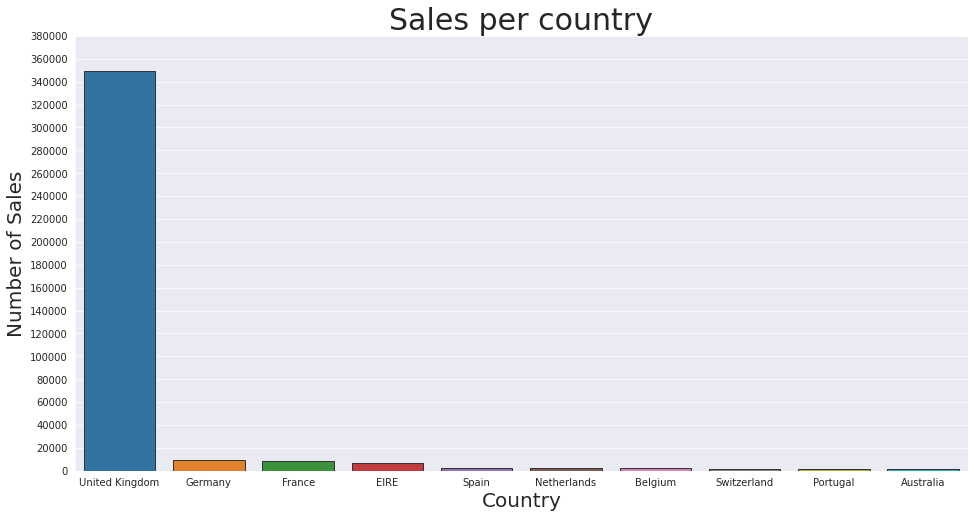

In [67]:
# plot sales for top 10 counties
country_data = dataset.groupby('Country').count().reset_index()
country_data.sort_values('InvoiceNo', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(data=country_data[0:10], x='Country', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,400000,20000))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of Sales', size=20)
axes.set_title('Sales per country', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


We have data of one year. We can checck total number of sales ordder per month

In [68]:
# get month from datetime object
dataset['Month'] = dataset['InvoiceDate'].apply(lambda x: x.month)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


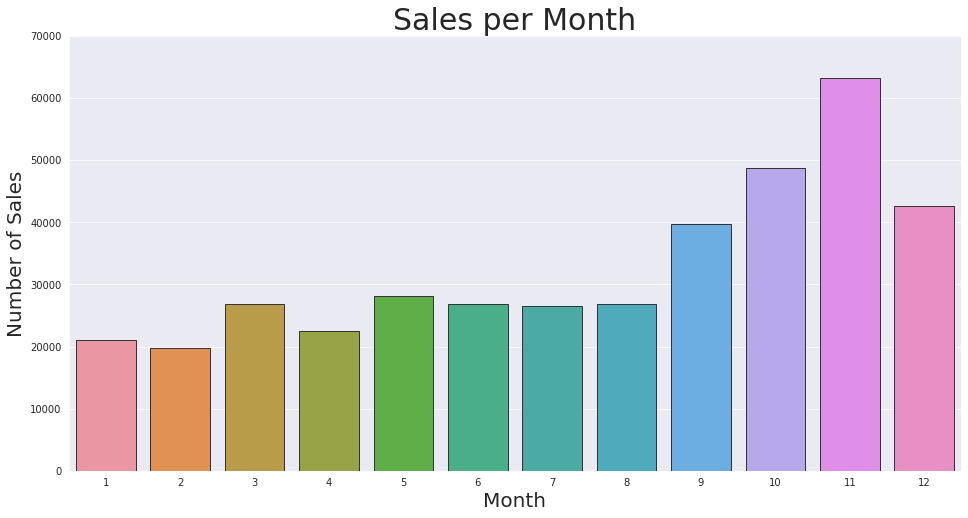

In [69]:
# plot sales for top 10 counties
month_data = dataset.groupby('Month').count().reset_index()
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(data=month_data, x='Month', y='InvoiceNo', ax=axes, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,80000,10000))
axes.set_xlabel('Month', size=20)
axes.set_ylabel('Number of Sales', size=20)
axes.set_title('Sales per Month', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

We can also calculate sales per customer. Sales order does not provide much more information related to profit but amount of money in the sales order provides more information. It is considered as MonetaryValue for the customer.

In [70]:
# get Monetary Value for each customer from quantity and unit price
dataset['MonetaryValue'] = dataset.apply(lambda x: x['Quantity'] * x['UnitPrice'], axis=1)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [71]:
customer_data = dataset.groupby('CustomerID').sum().reset_index()
customer_data.head()

,CustomerID,Quantity,UnitPrice,Month,MonetaryValue
0,12346.0,74215,1.04,1,77183.60
1,12347.0,2458,481.21,1383,4310.00
2,12348.0,2341,178.71,257,1797.24
3,12349.0,631,605.10,803,1757.55
4,12350.0,197,65.30,34,334.40


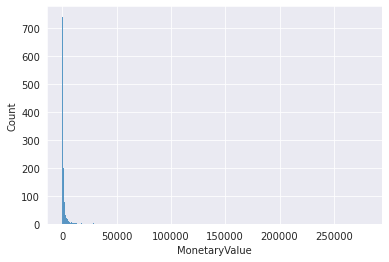

In [72]:
# plot Monetary value 
sns.histplot(customer_data['MonetaryValue'])

How frequently a person buys product is also a good parameter to decide customer segmentation for that customer.

In [73]:
customer_data.drop(columns=['Quantity', 'UnitPrice', 'Month'], inplace=True)

In [74]:
customer_data['Frequency'] = dataset.groupby('CustomerID')['MonetaryValue'].count().values
customer_data.head()

,CustomerID,MonetaryValue,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


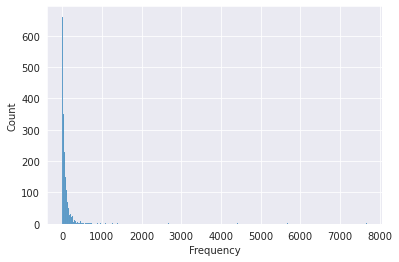

In [75]:
# plot Frequency
sns.histplot(customer_data['Frequency'])

Recently joined customers might not have many purchases. So, we need to check how long since the customer is joined the company.

We can calculate how many days have passed since the last purchase made by the customer. This also gives us information about old customers and how active they are.

In [76]:
# we have data till date 09/12/2011
# we will take next day as last date for calculation of time in number of days
last_date = date(2011,12,10)
# calculate time in days since last purchase order till the date
# get Monetary Value for each customer from quantity and unit price
dataset['Recency'] = dataset['InvoiceDate'].apply(lambda x: (last_date - pd.to_datetime(x).date()).days)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374


In [77]:
customer_data['Recency'] = dataset.groupby('CustomerID')['Recency'].min().values
customer_data.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,3
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


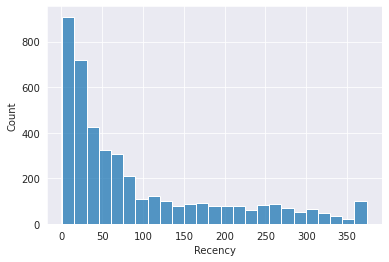

In [78]:
# plot Recency
sns.histplot(customer_data['Recency'])

## Data pre-processing

Our data is right-skewed. We can apply log transformation to remove the skewness.

In [79]:
customer_data.describe()

,CustomerID,MonetaryValue,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2048.215924,90.512100,93.041484
std,1721.889758,8984.248352,225.515328,100.007757
min,12346.000000,0.000000,1.000000,1.000000
25%,13812.500000,306.455000,17.000000,18.000000
50%,15299.000000,668.560000,41.000000,51.000000
75%,16778.500000,1660.315000,98.000000,142.500000
max,18287.000000,280206.020000,7676.000000,374.000000


In [80]:
# apply log transformation to remove skewness
# the minimum value for MonetaryValue is 0
# we need to add a small number to log transform this value (log of 0 will result in negative infinity)
customer_data['MonetaryValue'] = customer_data['MonetaryValue'].apply(lambda x: np.log(x + 1)) # add 1 for free items in sales
customer_data['Frequency'] = customer_data['Frequency'].apply(lambda x: np.log(x))
customer_data['Recency'] = customer_data['Recency'].apply(lambda x: np.log(x))
customer_data.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,11.253955,0.000000,5.786897
1,12347.0,8.368925,5.204007,1.098612
2,12348.0,7.494564,3.433987,4.330733
3,12349.0,7.472245,4.290459,2.944439
4,12350.0,5.815324,2.833213,5.739793


In [81]:
customer_data.describe()

,CustomerID,MonetaryValue,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,6.587044,3.670868,3.800803
std,1721.889758,1.262262,1.321685,1.383560
min,12346.000000,0.000000,0.000000,0.000000
25%,13812.500000,5.728329,2.833213,2.890372
50%,15299.000000,6.506621,3.713572,3.931826
75%,16778.500000,7.415365,4.584967,4.959336
max,18287.000000,12.543284,8.945854,5.924256


Text(0.5, 0.98, 'Data distribution after log transform')

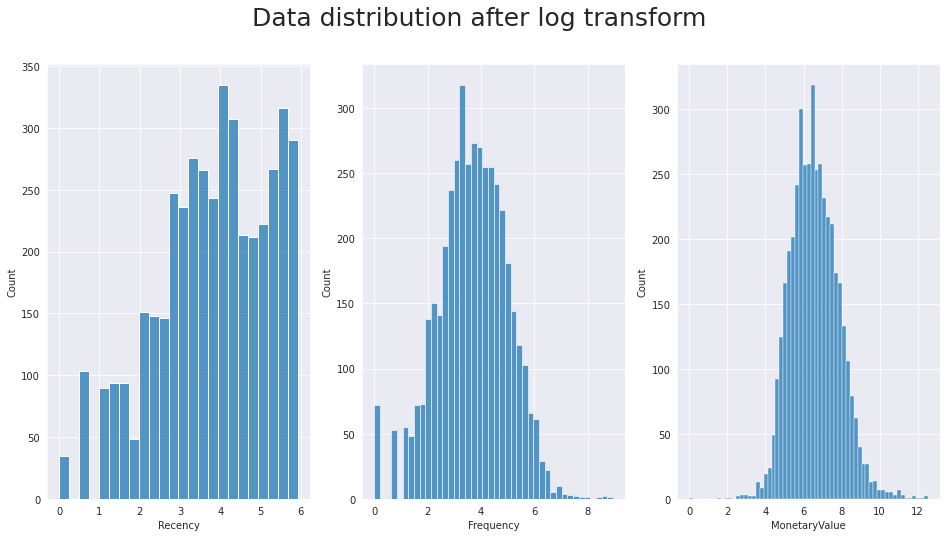

In [84]:
# plot the data distribution after log transform
fig, axis = plt.subplots(nrows=1, ncols= 3, figsize=(16,8))
sns.histplot(customer_data['Recency'], ax=axis[0])
sns.histplot(customer_data['Frequency'], ax=axis[1])
sns.histplot(customer_data['MonetaryValue'], ax=axis[2])
fig.suptitle("Data distribution after log transform", size=25)

We have removed skewness from data now we can start with segmentation.

# **RFM Segmentation**

RFM stands for Recency, Frequency, and Monetary. 
RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

Let's see how these data points look like in 3d space.

Text(0.5, 0.92, 'Data Visualization')

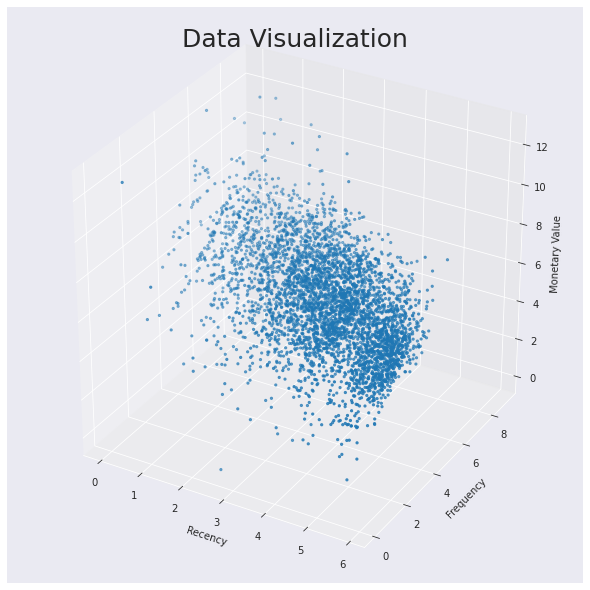

In [90]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = customer_data['Recency']
y = customer_data['Frequency']
z = customer_data['MonetaryValue']
ax.scatter(x, y, z, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title("Data Visualization", size=25)

## **K-Means Clustering**

Our dataset is large so Hierarchical clustering is not well suited for analysis. So, we will use the K-Means clustering algorithm, which is easy to apply fast, and accurate for clustering problems.


K-Means algorithm requires number of clusters as a parameter to group data points in clusters. To find the number of clusters we can use the Elbow method or Silhouette analysis.  

### Elbow Method

In [91]:
customer_data.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,11.253955,0.000000,5.786897
1,12347.0,8.368925,5.204007,1.098612
2,12348.0,7.494564,3.433987,4.330733
3,12349.0,7.472245,4.290459,2.944439
4,12350.0,5.815324,2.833213,5.739793


In [92]:
# CustomerID does not provide any information in clusturing 
# remove the column from data
data = customer_data.drop(columns=['CustomerID'])
data.head()

,MonetaryValue,Frequency,Recency
0,11.253955,0.000000,5.786897
1,8.368925,5.204007,1.098612
2,7.494564,3.433987,4.330733
3,7.472245,4.290459,2.944439
4,5.815324,2.833213,5.739793


In [95]:
# calculate Elbow method scores
sse = {} # sum of squared errors
# use cluster from range 1 to 20
for k in range(1, 21):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit KMeans on the dataset
    kmeans.fit(data)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_ # Used for Plotting the elbow plot

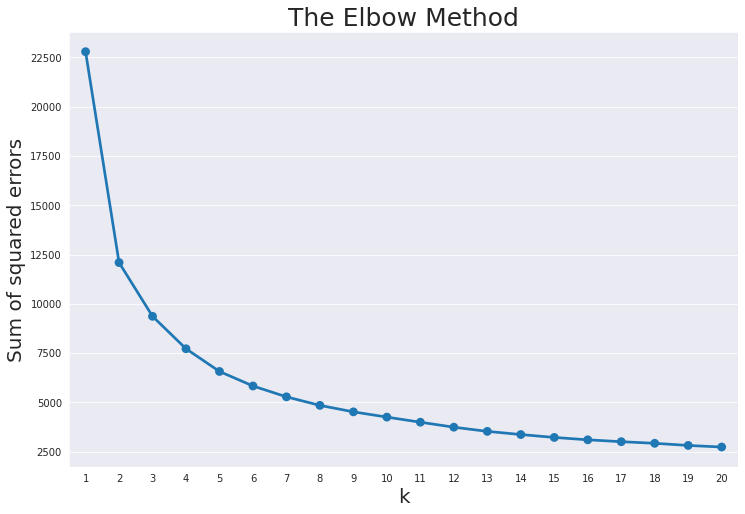

In [98]:
# the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method', size=25)
plt.xlabel('k', size=20); 
plt.ylabel('Sum of squared errors', size=20)
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

We can see that error is decreasing as K increases. For values of k at 4 or 5 slope of the curve is decreasing very fast this means errors do not decrease much faster as the increase in number of clusters.

These clusters represent customer segmentation and to utilize these segmentations company needs to invent new policies for each segment. So, increase in customer segment cause extra cost for compy for implementation of new policies so very large value of k is not desirable.

We can keep value of k=4.

### Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.394270939426871
For n_clusters = 3 The average silhouette_score is : 0.3006942221722135
For n_clusters = 4 The average silhouette_score is : 0.304582970118451
For n_clusters = 5 The average silhouette_score is : 0.2810078929153509
For n_clusters = 6 The average silhouette_score is : 0.2794154183148284
For n_clusters = 7 The average silhouette_score is : 0.26706932201469596
For n_clusters = 8 The average silhouette_score is : 0.26389714641508677


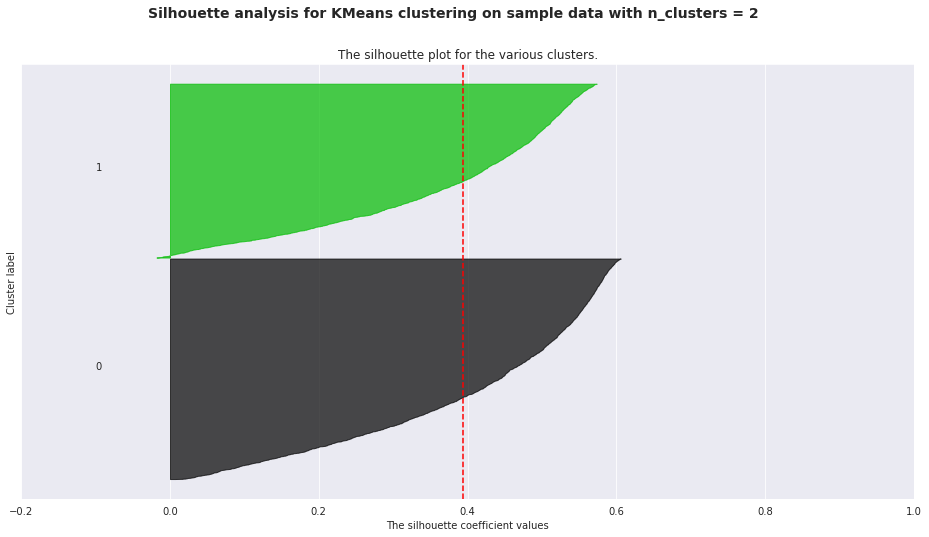

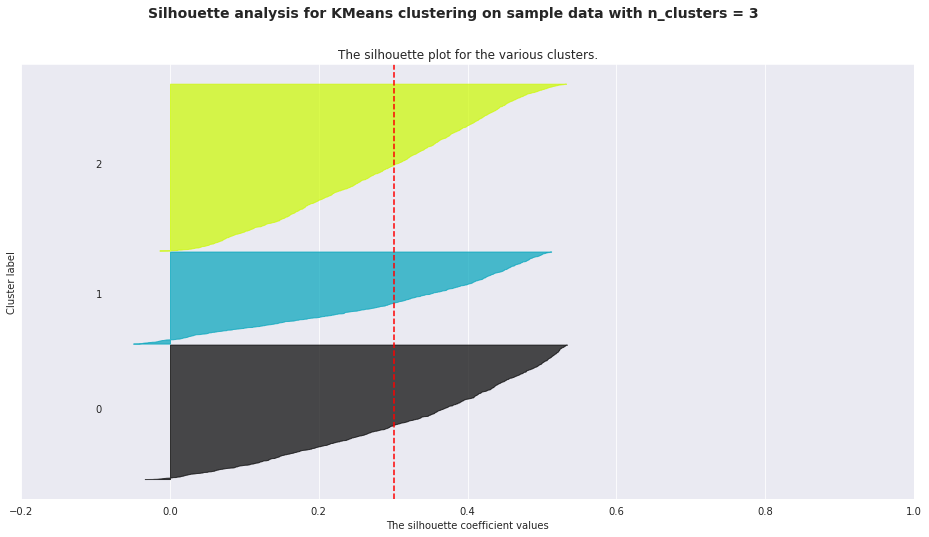

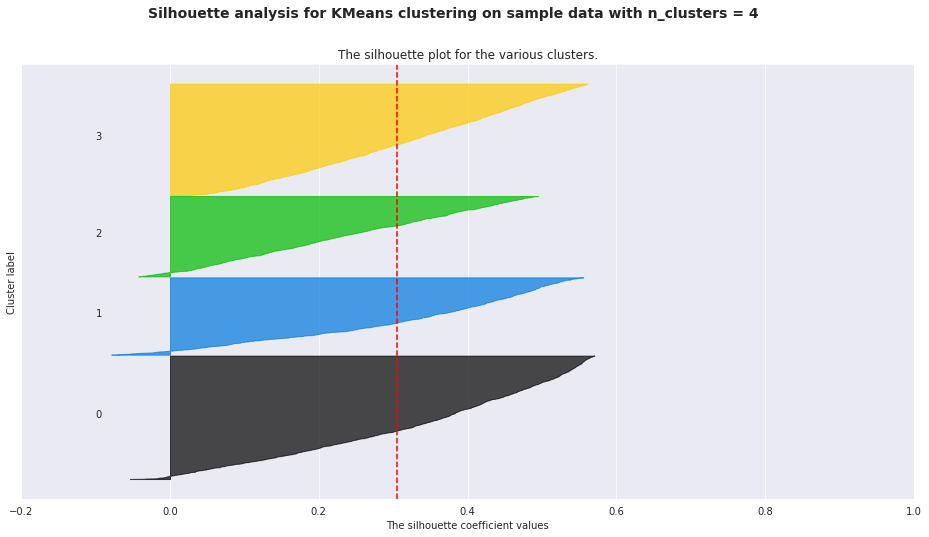

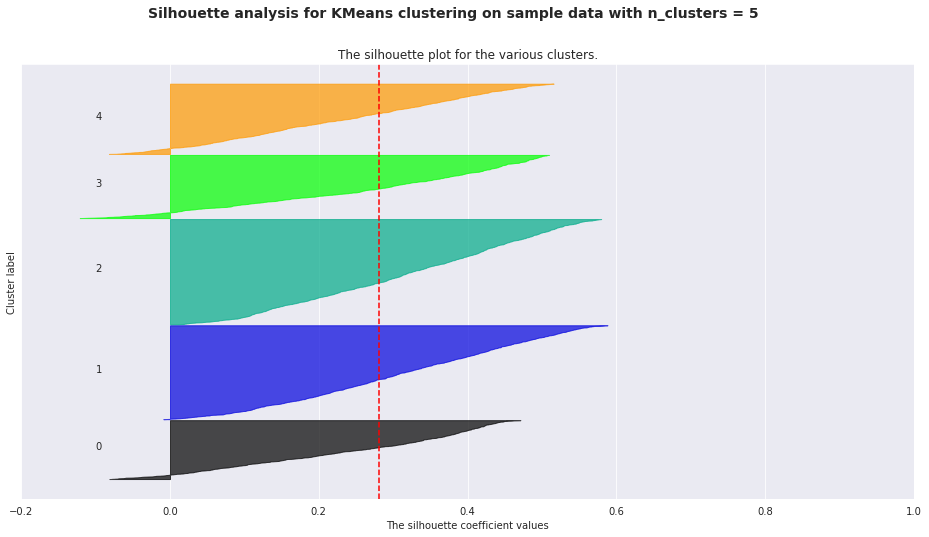

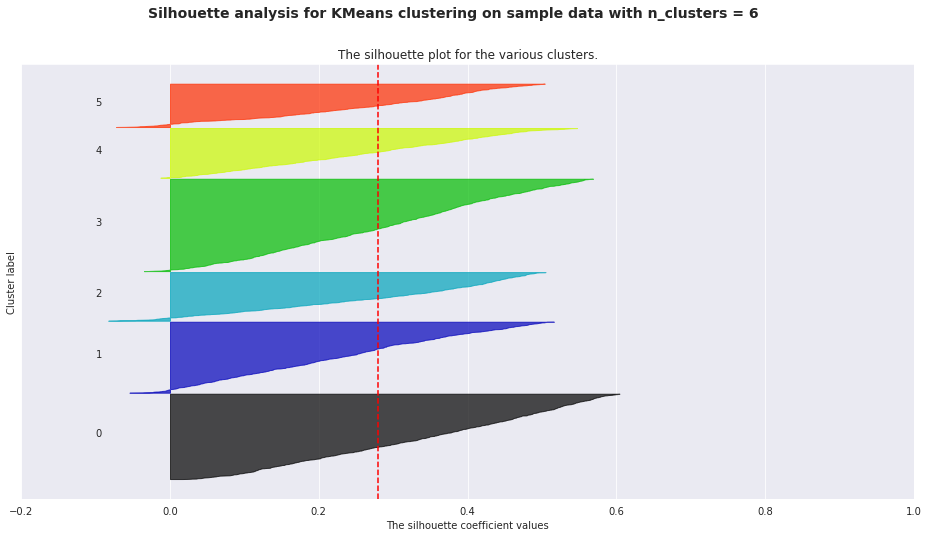

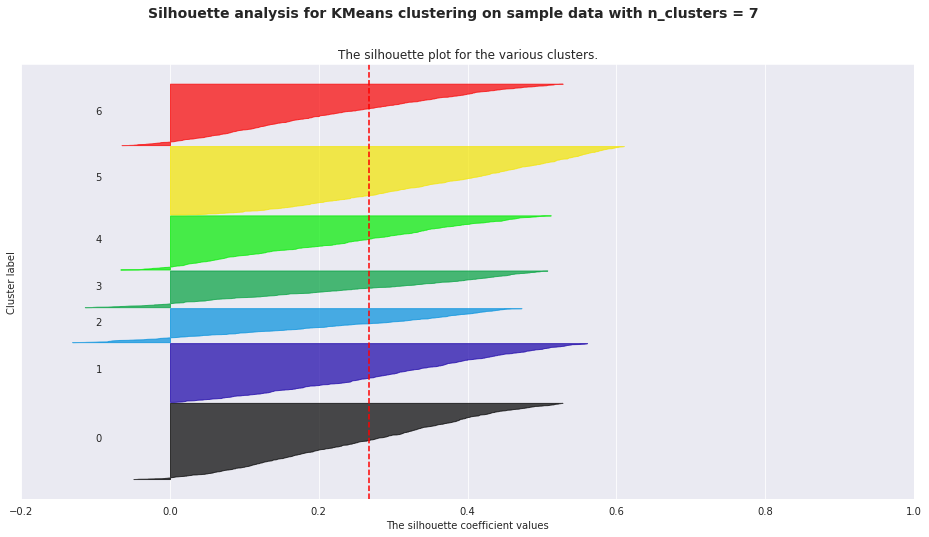

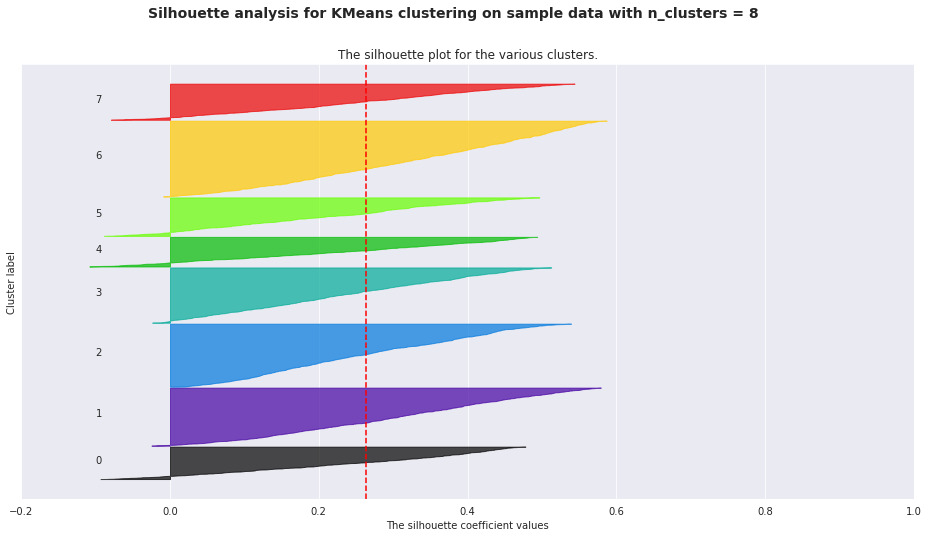

In [104]:
# make a list of clusters to check
clusters_list = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in clusters_list:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    fig, axis = plt.subplots(figsize=(16,8))
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axis.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axis.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axis.set_title("The silhouette plot for the various clusters.")
    axis.set_xlabel("The silhouette coefficient values")
    axis.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis.axvline(x=silhouette_avg, color="red", linestyle="--")

    axis.set_yticks([])  # Clear the yaxis labels / ticks
    axis.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
   
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')


K=4 have optimal score. Let's visualize these clusters.

In [109]:
clusterer = KMeans(n_clusters=4, random_state=1)
cluster_labels = clusterer.fit_predict(data)

In [111]:
cluster_labels

array([3, 1, 3, ..., 2, 1, 3], dtype=int32)

Text(0.5, 0.92, 'Data Visualization')

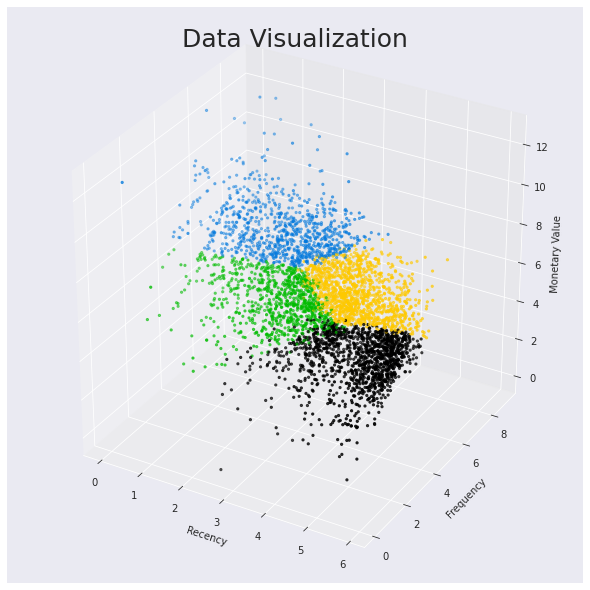

In [115]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = data['Recency']
y = data['Frequency']
z = data['MonetaryValue']
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax.scatter(x, y, z, c=colors, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title("Data Visualization", size=25)

In [117]:
# add cluster label to each data point
customer_data['Cluster'] = cluster_labels
customer_data.head()

,CustomerID,MonetaryValue,Frequency,Recency,Cluster
0,12346.0,11.253955,0.000000,5.786897,3
1,12347.0,8.368925,5.204007,1.098612,1
2,12348.0,7.494564,3.433987,4.330733,3
3,12349.0,7.472245,4.290459,2.944439,1
4,12350.0,5.815324,2.833213,5.739793,0


In [118]:
# calculate mean of each feature for clusters
cluster_data = data.groupby('Cluster').mean()
cluster_data

,MonetaryValue,Frequency,Recency
Cluster,,,
0,5.432112,2.364337,5.016184
1,8.215480,5.283759,2.156495
2,6.187012,3.424565,2.750780
3,7.024608,4.176188,4.354478


In [120]:
# We have log-transformed the features now to get more intuition take exponential of each feature
cluster_data = cluster_data.applymap(np.exp)
cluster_data = cluster_data.applymap(int)
cluster_data

,MonetaryValue,Frequency,Recency
Cluster,,,
0,228,10,150
1,3697,197,8
2,486,30,15
3,1123,65,77


## **Conclusion**